In [24]:
import numpy as np
from bayes_opt import BayesianOptimization
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Adagrad, Adadelta, SGD
from sklearn.model_selection import train_test_split
from talos.utils import lr_normalizer
from sklearn.metrics import mean_squared_error
from math import floor, sqrt
from keras.regularizers import l2


In [25]:
path = "E:/Desktop/AbsorptionANN/DATA_ANN_Edited.csv"

df = pd.read_csv(path, header=None)

x = df.values[:, :-1].astype('float32')
y = df.values[:, -1].astype('float32')
y = y.reshape((len(y), 1))

scaler = MinMaxScaler()
scaler.fit(df)
normalized = scaler.transform(df)
new_series = pd.DataFrame(normalized)
x = new_series.values[:, :-1].astype('float32')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [27]:
def Abs_NN(first_neuron,dropout,lr,batch_size,momentum,weight_decay,activation):
    path = "E:/Desktop/AbsorptionANN/DATA_ANN_Edited.csv"
    df = pd.read_csv(path, header=None)
    x = df.values[:, :-1].astype('float32')
    y = df.values[:, -1].astype('float32')
    y = y.reshape((len(y), 1))
    scaler = MinMaxScaler()
    scaler.fit(df)
    normalized = scaler.transform(df)
    new_series = pd.DataFrame(normalized)
    x = new_series.values[:, :-1].astype('float32')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    if activation<0.5:
        activation = 'relu'
    else:
        activation = 'tanh'

    model = Sequential()
    model.add(Dense(floor(first_neuron), input_dim=5,
                    activation=activation,
                    kernel_initializer='random_uniform',
                    kernel_regularizer=l2(weight_decay) ))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear',
                    kernel_initializer='random_uniform'))
    model.compile(loss='mse',
                  optimizer=RMSprop(lr=lr_normalizer(lr, RMSprop),momentum=momentum),
                  metrics='mae')
    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test),
                        batch_size=floor(batch_size),
                        epochs=500,
                        verbose=0)
    y_pred  = model.predict(x_test)
    MSE=mean_squared_error(y_test, y_pred)
    RMSE=-sqrt(MSE)
    return RMSE

In [28]:
# Bounded region of parameter space
pbounds = {'first_neuron': (5, 50), 'dropout': (0, 0.4), 'lr': (0.000001, 0.1), 
            'batch_size': (5, len(y_train)), 'momentum': (0.8, 0.999), 'weight_decay': (0, 0.1), 'activation': (0,1)}

optimizer = BayesianOptimization(
    f=Abs_NN,
    pbounds=pbounds,
    random_state=12,
)

In [29]:
optimizer.maximize(
    init_points=300,
    n_iter=1000,
)

|   iter    |  target   | activa... | batch_... |  dropout  | first_... |    lr     | momentum  | weight... |
-------------------------------------------------------------------------------------------------------------
|  1        | -17.6     |  0.1542   |  47.18    |  0.1053   |  29.02    |  0.001458 |  0.9828   |  0.09007  |
|  2        | -5.307    |  0.03342  |  59.55    |  0.05488  |  17.77    |  0.06061  |  0.9879   |  0.08527  |
|  3        | -11.93    |  0.002259 |  34.71    |  0.2208   |  26.84    |  0.07681  |  0.832    |  0.07646  |
|  4        | -6.215    |  0.02081  |  12.71    |  0.04651  |  18.95    |  0.06715  |  0.8938   |  0.08162  |
|  5        | -4.463    |  0.2896   |  46.79    |  0.281    |  19.74    |  0.03347  |  0.9946   |  0.06246  |
|  6        | -12.27    |  0.9503   |  48.75    |  0.33     |  23.3     |  0.04513  |  0.8797   |  0.09951  |
|  7        | -16.67    |  0.1776   |  59.87    |  0.1677   |  24.08    |  0.04632  |  0.8744   |  0.04655  |
|  8      

In [30]:
print(optimizer.max)

{'target': -2.0099016890515067, 'params': {'activation': 0.6783123897985291, 'batch_size': 7.5945596933904955, 'dropout': 0.06797477740801458, 'first_neuron': 44.179986130210814, 'lr': 0.1, 'momentum': 0.9972227398680799, 'weight_decay': 0.0}}


In [35]:
def Abs_NN(first_neuron,dropout,lr,batch_size,momentum,weight_decay,activation):
    path = "E:/Desktop/AbsorptionANN/DATA_ANN_Edited.csv"
    df = pd.read_csv(path, header=None)
    x = df.values[:, :-1].astype('float32')
    y = df.values[:, -1].astype('float32')
    y = y.reshape((len(y), 1))
    scaler = MinMaxScaler()
    scaler.fit(df)
    normalized = scaler.transform(df)
    new_series = pd.DataFrame(normalized)
    x = new_series.values[:, :-1].astype('float32')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    if activation<0.5:
        activation = 'relu'
    else:
        activation = 'tanh'

    model = Sequential()
    model.add(Dense(floor(first_neuron), input_dim=5,
                    activation=activation,
                    kernel_initializer='random_uniform',
                    kernel_regularizer=l2(weight_decay) ))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear',
                    kernel_initializer='random_uniform'))
    model.compile(loss='mse',
                  optimizer=RMSprop(lr=lr_normalizer(lr, RMSprop),momentum=momentum),
                  metrics='mae')
    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test),
                        batch_size=floor(batch_size),
                        epochs=500,
                        verbose=0)
    y_pred  = model.predict(x_test)
    MSE=mean_squared_error(y_test, y_pred)
    RMSE=-sqrt(MSE)
    return RMSE, model

Root mean square = 2.234902913077834
Mean Square = 4.994791


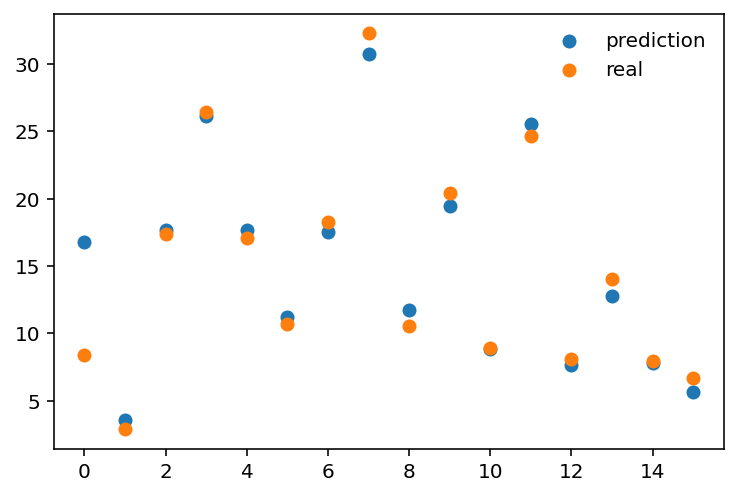

In [36]:
RMSE , model = Abs_NN(optimizer.max['params']['first_neuron'],optimizer.max['params']['dropout'],optimizer.max['params']['lr'],optimizer.max['params']['batch_size'],optimizer.max['params']['momentum'],optimizer.max['params']['weight_decay'],optimizer.max['params']['activation'])

y_pred  = model.predict(x_test)
from sklearn.metrics import mean_squared_error
import math
MSE=mean_squared_error(y_test, y_pred)
RMSE=math.sqrt(MSE)
print("Root mean square = "+str(RMSE))
print("Mean Square = "+str(MSE))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import math
import numpy as np

fig = plt.figure()
plt.scatter(np.arange(len(y_pred)), y_pred, label='prediction')
plt.scatter(np.arange(len(y_test)), y_test, label='real')
plt.legend(frameon=False)
plt.show()

Root mean square = 1.2174139279875622
Mean Square = 1.4820967


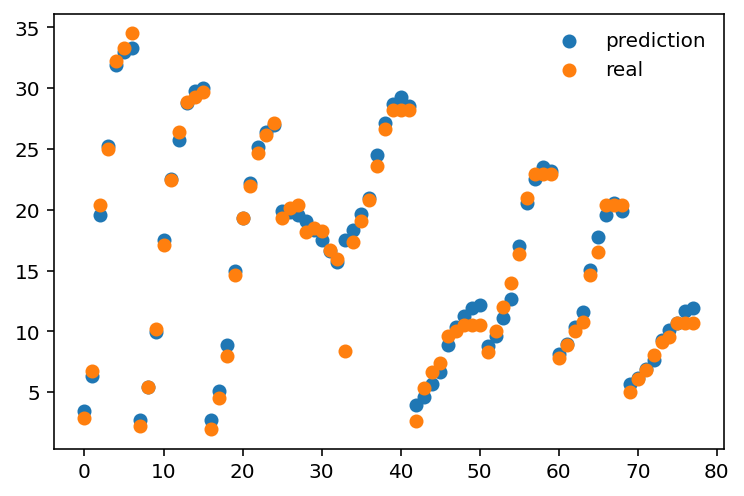

In [33]:
y_pred  = model.predict(x)
from sklearn.metrics import mean_squared_error
import math
MSE=mean_squared_error(y, y_pred)
RMSE=math.sqrt(MSE)
print("Root mean square = "+str(RMSE))
print("Mean Square = "+str(MSE))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import math
import numpy as np

fig = plt.figure()
plt.scatter(np.arange(len(y_pred)), y_pred, label='prediction')
plt.scatter(np.arange(len(y)), y, label='real')
plt.legend(frameon=False)
plt.show()